<a href="https://colab.research.google.com/github/Jatin1895470/Deep-Learning-Assignment1/blob/main/LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


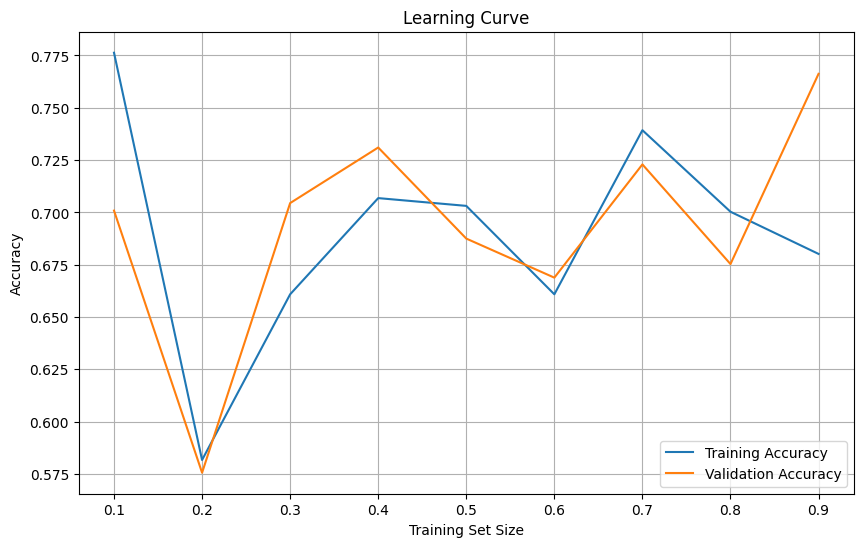

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import Perceptron


data_path = "/content/drive/MyDrive/diabetes_scale.txt"


X, y = load_svmlight_file(data_path)


train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


train_scores = []
val_scores = []


for train_size in train_sizes:

    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.toarray())
    X_val = scaler.transform(X_val.toarray())


    model = Perceptron(eta0=0.01, max_iter=100)
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)


    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)


    train_scores.append(train_accuracy)
    val_scores.append(val_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy")
plt.plot(train_sizes, val_scores, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
